In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")
x = df.drop(["Outcome"],axis=1)
y = df["Outcome"]

In [3]:
scaler = StandardScaler()
scaler.fit(x)
std = scaler.transform(x)
x = std

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=101)
classifier = svm.SVC(kernel="linear")
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [5]:
train_prediction = classifier.predict(x_train)
train_accuracy = accuracy_score(train_prediction,y_train)
train_accuracy*100

77.85016286644951

In [6]:
test_prediction = classifier.predict(x_test)
test_accuracy = accuracy_score(test_prediction,y_test)
test_accuracy*100

77.27272727272727

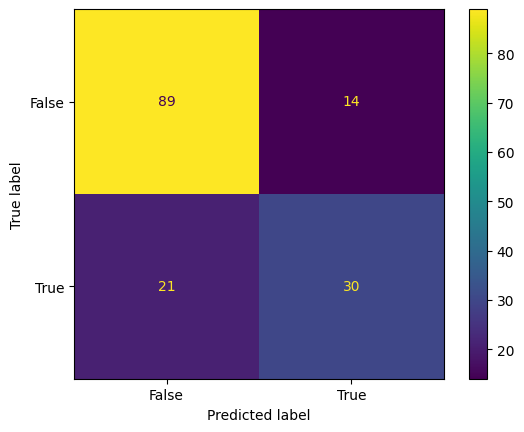

In [7]:
cf = confusion_matrix(y_test,test_prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])
cm_display.plot()
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
params = {'C':[0.1,1,100],'kernel':['linear','rbf','poly','sigmoid'],'degree':[1,2,3,4,5,6] }

In [10]:
grid = GridSearchCV(svm.SVC(),params)
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.score(x_test,y_test))

{'C': 100, 'degree': 1, 'kernel': 'poly'}
0.7857142857142857
